In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import linear_model
#from sklearn.cross_validation import train_test_split # not get import for me

from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler


#%matplotlib inlinet
# data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

from sklearn.datasets import load_boston
boston = load_boston()


# Any results you write to the current directory are saved as output.
from sklearn.linear_model import LinearRegression 

from datetime import datetime, date
from sklearn import*
import nltk, datetime

In [2]:
import os
#os.getcwd() # to find a file loaction etc
os.chdir('C:\\Users\\Lovedhaliwal\\Downloads\\StudyConcordia\\Project\\DATA')


train = pd.read_csv('sales_train_v2.csv')
test = pd.read_csv('test.csv')
categories =pd.read_csv('item_categories.csv')
items =pd.read_csv('items.csv')
submission =pd.read_csv('sample_submission.csv')
shops=pd.read_csv('shops.csv')


In [3]:
print("***** Train_Set *****")
print(train.head())
print("\n")
print("***** Test_Set *****")
print(test.head())

***** Train_Set *****
         date  date_block_num  shop_id  item_id  item_price  item_cnt_day
0  02.01.2013               0       59    22154      999.00           1.0
1  03.01.2013               0       25     2552      899.00           1.0
2  05.01.2013               0       25     2552      899.00          -1.0
3  06.01.2013               0       25     2554     1709.05           1.0
4  15.01.2013               0       25     2555     1099.00           1.0


***** Test_Set *****
   ID  shop_id  item_id
0   0        5     5037
1   1        5     5320
2   2        5     5233
3   3        5     5232
4   4        5     5268


In [4]:
print("***** Train_Set *****")
print(train.describe())
print("\n")
print("***** Test_Set *****")
print(test.describe())

***** Train_Set *****
       date_block_num       shop_id       item_id    item_price  item_cnt_day
count    2.935849e+06  2.935849e+06  2.935849e+06  2.935849e+06  2.935849e+06
mean     1.456991e+01  3.300173e+01  1.019723e+04  8.908532e+02  1.242641e+00
std      9.422988e+00  1.622697e+01  6.324297e+03  1.729800e+03  2.618834e+00
min      0.000000e+00  0.000000e+00  0.000000e+00 -1.000000e+00 -2.200000e+01
25%      7.000000e+00  2.200000e+01  4.476000e+03  2.490000e+02  1.000000e+00
50%      1.400000e+01  3.100000e+01  9.343000e+03  3.990000e+02  1.000000e+00
75%      2.300000e+01  4.700000e+01  1.568400e+04  9.990000e+02  1.000000e+00
max      3.300000e+01  5.900000e+01  2.216900e+04  3.079800e+05  2.169000e+03


***** Test_Set *****
                  ID        shop_id        item_id
count  214200.000000  214200.000000  214200.000000
mean   107099.500000      31.642857   11019.398627
std     61834.358168      17.561933    6252.644590
min         0.000000       2.000000      30.00000

In [5]:
print("***** Train_Set *****")
print(train.info())
print("\n")
print("***** Test_Set *****")
print(test.info())

***** Train_Set *****
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
date              object
date_block_num    int64
shop_id           int64
item_id           int64
item_price        float64
item_cnt_day      float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB
None


***** Test_Set *****
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214200 entries, 0 to 214199
Data columns (total 3 columns):
ID         214200 non-null int64
shop_id    214200 non-null int64
item_id    214200 non-null int64
dtypes: int64(3)
memory usage: 4.9 MB
None


In [6]:
print("***** Train_Set *****")
print(train.isna().sum())
print("\n")
print("***** Test_Set *****")
print(test.isna().sum())

***** Train_Set *****
date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64


***** Test_Set *****
ID         0
shop_id    0
item_id    0
dtype: int64


# Convert Date to Python format and dropped old date and item_price columns 

In [7]:

train['date'] = pd.to_datetime(train['date'], format='%d.%m.%Y') # converting date’s into normal date format
#above code works all it need to replace "/" with "." maybe beacuse in csv we have 02.01.1998


train['month'] = train ['date'].dt.month
train['year'] = train ['date'].dt.year

train = train.drop(['date', 'item_price'],axis = 1)

# next we going to group item count for per month using the date_block_num which is present in .csv

train = train.groupby([c for c in train.columns if c not in ['item_cnt_day']], as_index= False)[['item_cnt_day']].sum()      

train = train.rename( columns= {'item_cnt_day' : 'item_cnt_month'})

train.head()

,date_block_num,shop_id,item_id,month,year,item_cnt_month
0,0,0,32,1,2013,6.0
1,0,0,33,1,2013,3.0
2,0,0,35,1,2013,1.0
3,0,0,43,1,2013,1.0
4,0,0,51,1,2013,2.0


In [8]:
print("***** Train_Set *****")
print(train.info())

***** Train_Set *****
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1609124 entries, 0 to 1609123
Data columns (total 6 columns):
date_block_num    1609124 non-null int64
shop_id           1609124 non-null int64
item_id           1609124 non-null int64
month             1609124 non-null int64
year              1609124 non-null int64
item_cnt_month    1609124 non-null float64
dtypes: float64(1), int64(5)
memory usage: 85.9 MB
None


In [9]:
print ("MAX",train['item_cnt_month'].max() )
print ("MEDIAM",train['item_cnt_month'].median() )
print ("MIN",train['item_cnt_month'].min() )

MAX 2253.0
MEDIAM 1.0
MIN -22.0


# Checking the data visually

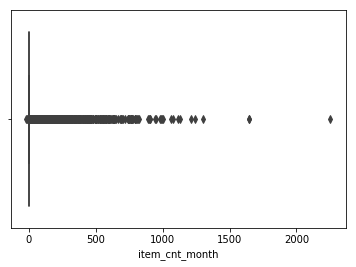

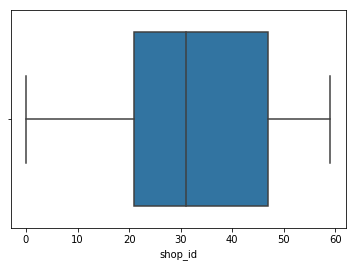

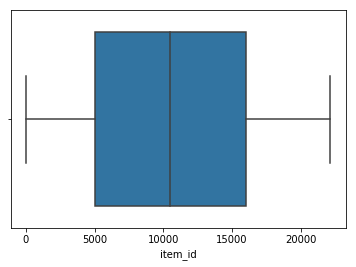

In [10]:
# Checking the data visually

sns.boxplot(train['item_cnt_month'])
plt.show()


sns.boxplot(train['shop_id'])
plt.show()


sns.boxplot(train['item_id'])
plt.show()

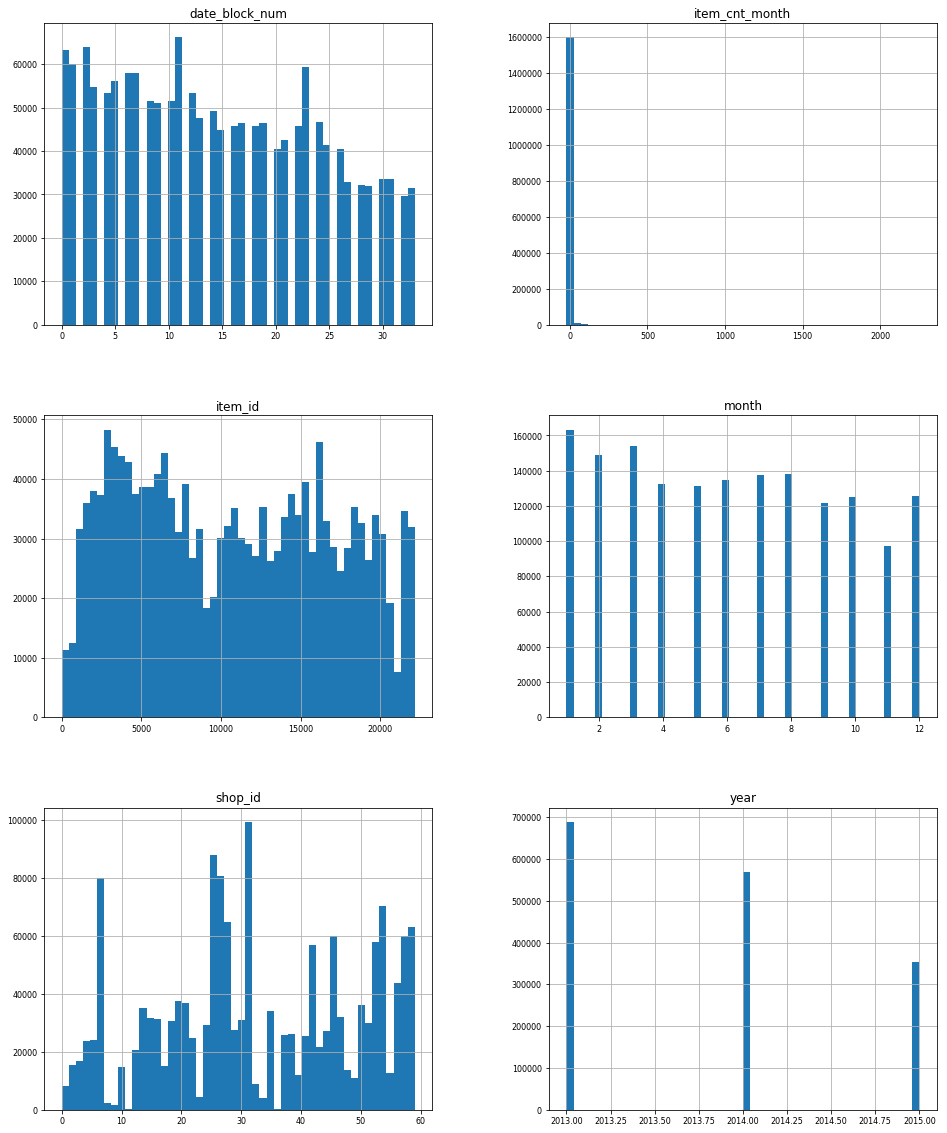

In [11]:
# Ekploring all the columns data visually
train.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8); # ; avoid having the matplotlib verbose informations


In [12]:
# Top 5 values from "item_cnt_month"
train.nlargest(5,"item_cnt_month")

,date_block_num,shop_id,item_id,month,year,item_cnt_month
1582127,33,12,11373,10,2015,2253.0
1552020,32,12,9248,9,2015,1644.0
1574410,32,55,9249,9,2015,1644.0
657943,11,31,20949,12,2013,1305.0
1412964,27,55,3730,4,2015,1242.0


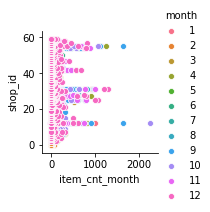

In [13]:
sns.pairplot(data=train, x_vars="item_cnt_month", y_vars="shop_id", hue ='month' )

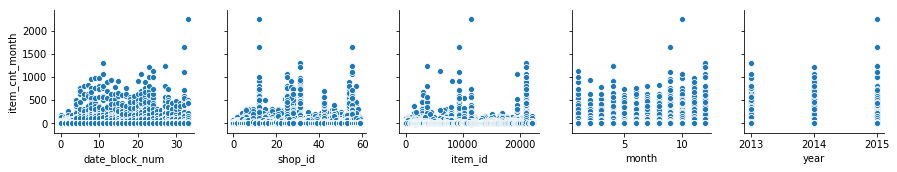

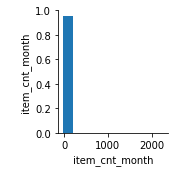

In [14]:

for i in range(0, len(train.columns), 5):
    sns.pairplot(data=train,
                x_vars=train.columns[i:i+5],
                y_vars=['item_cnt_month'])
    
    #For item_cnt_month date_block_num, year, shop_id and item id are main attributes
    

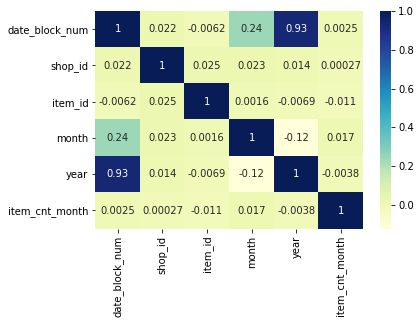

In [15]:
sns.heatmap(train.corr(), cmap="YlGnBu" , annot = True)
plt.show()

#below heat map display the attribute realation ship
    #relation between Item_cnt_month and month = 0.018
    #relation between Item_id and shop_id = 0.025

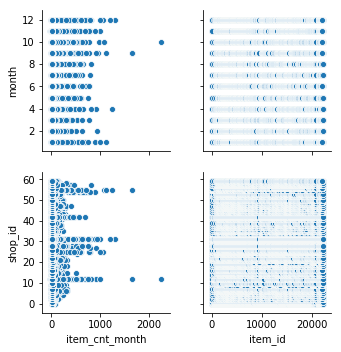

In [16]:
#below code display relation for :
    #relation between Item_cnt_month and month = 0.018
    #relation between Item_id and shop_id = 0.025
sns.pairplot(train,
    x_vars=["item_cnt_month", "item_id"],
    y_vars=["month", "shop_id"])

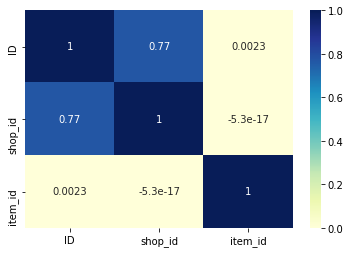

In [17]:
sns.heatmap(test.corr(), cmap="YlGnBu" , annot = True)
plt.show()

#below heat map display the attribute realation ship

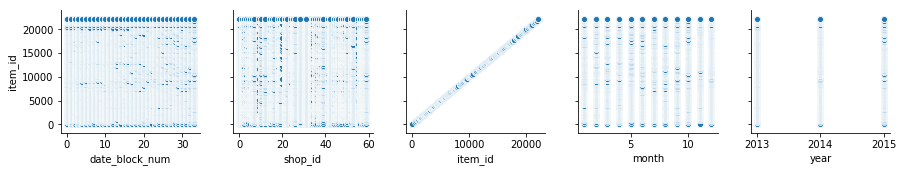

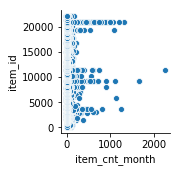

In [18]:
for i in range(0, len(train.columns), 5):
    sns.pairplot(data=train,
                x_vars=train.columns[i:i+5],
                y_vars=['item_id'])
#For item_id = item_cnt_month and shop_id are main attributes
    

# Use group by to find relationship between the attributes  under varibales "data1 to data2"

In [27]:
data1 = train[['item_cnt_month', 'month']].groupby(['item_cnt_month'], as_index=False).mean().sort_values(by='month', ascending=False)
data1.head()

,item_cnt_month,month
328,404.0,12.0
234,235.0,12.0
309,359.0,12.0
293,319.0,12.0
292,317.0,12.0


In [26]:
data2 =train[['shop_id', 'item_id']].groupby(['shop_id'], as_index=False).mean().sort_values(by='item_id', ascending=False)
data2.head()

,shop_id,item_id
20,20,17086.255346
9,9,13957.633564
40,40,12548.893960
13,13,12043.392152
31,31,11640.703882


In [33]:
data3 = train[['item_cnt_month', 'date_block_num']].groupby(['item_cnt_month'], as_index=False).mean().sort_values(by='date_block_num', ascending=False)
data1.head()

,item_cnt_month,month
328,404.0,12.0
234,235.0,12.0
309,359.0,12.0
293,319.0,12.0
292,317.0,12.0


# below code is showing graphical representation of group by out come

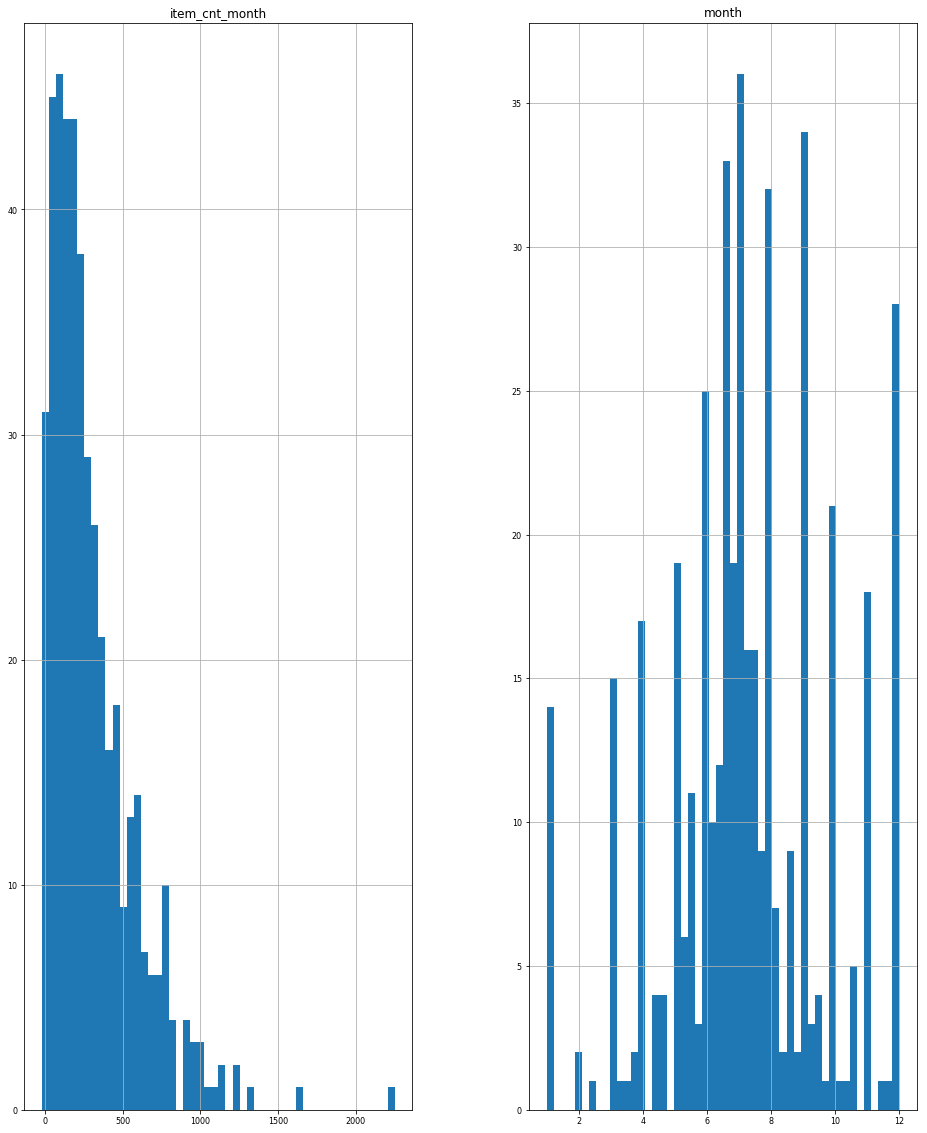

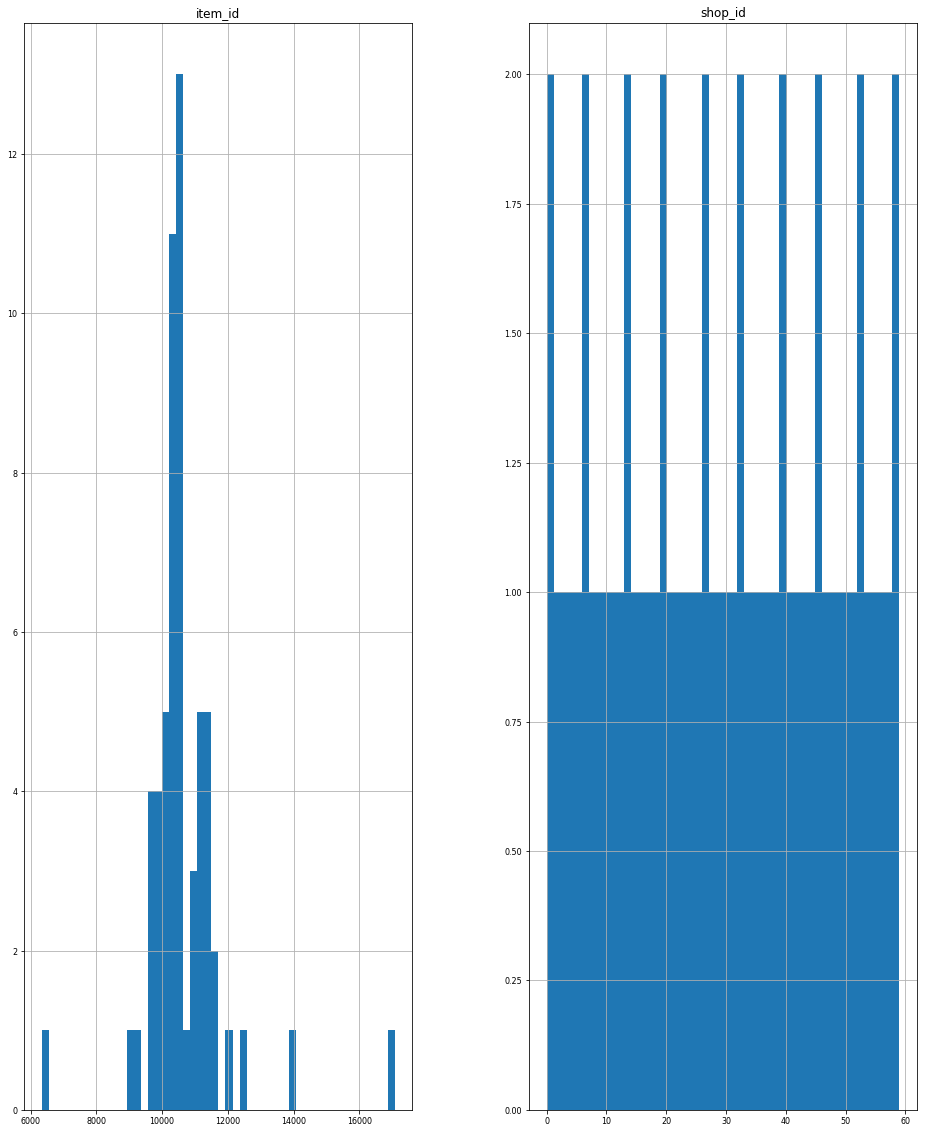

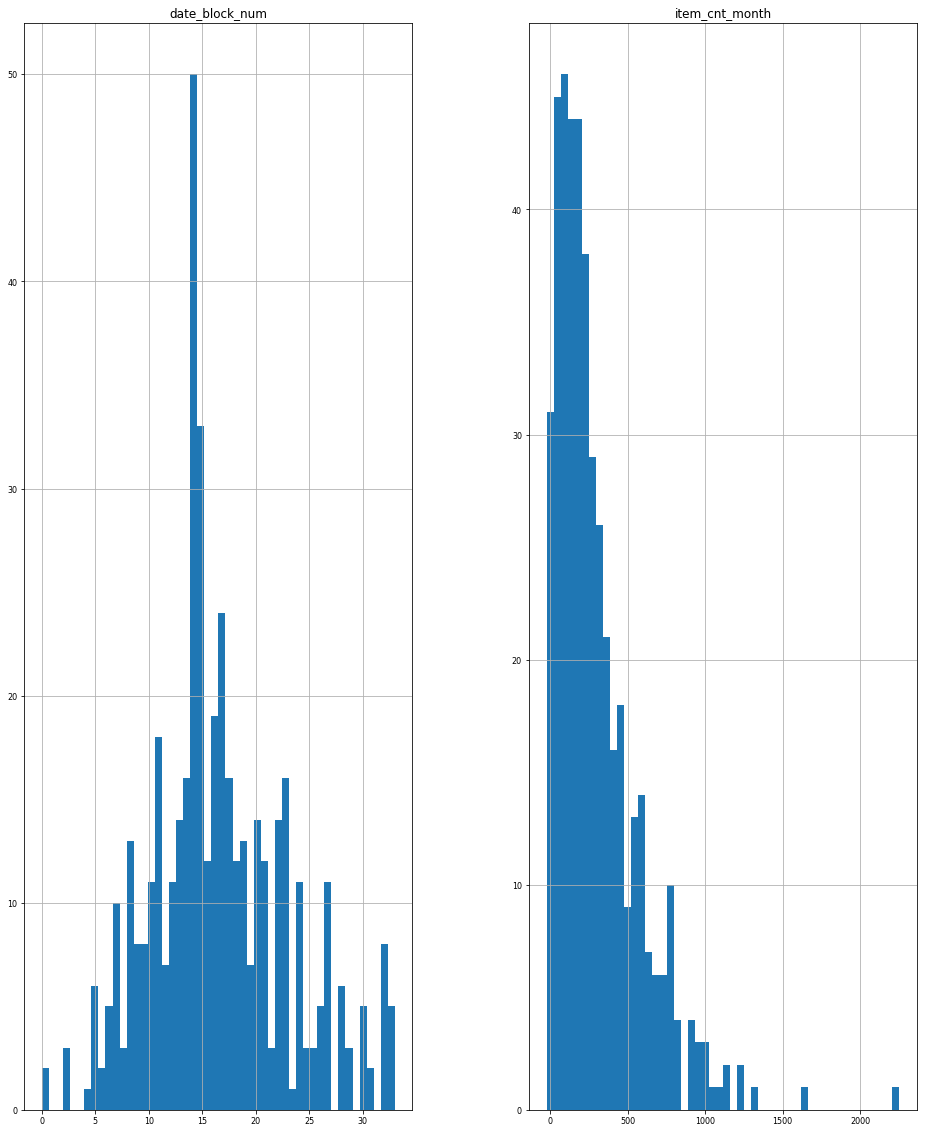

In [34]:
data1.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8); # ; avoid having the matplotlib verbose informations
print("\n")
data2.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);
print("\n")
data3.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

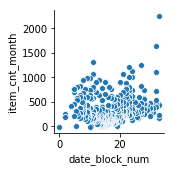

In [36]:
#below code display relation for :
    #relation between Item_cnt_month and month = 0.018
    #relation between Item_id and shop_id = 0.025
sns.pairplot(data3,
    x_vars=["date_block_num"],
    y_vars=["item_cnt_month"])

In [21]:
kmeans = KMeans(n_clusters=2) # You want cluster the passenger records into 2: Survived or Not survived
kmeans.fit(train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)